In [1]:
 
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#PART 1 & 2

url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv' # URL of the dataset we need to extract.
df = pd.read_csv(url,index_col=0,parse_dates=[0])  # Creates a DataFrame from the CSV file.



In [5]:
#PART 3

x = df.groupby(['Date','Country/Region']).sum()  # Merges the data for countries with multiple regions in order to provide a single time-series for each country.  

x_final = x.reset_index()    # Reset Index allows the table to be in a single time series format. 

x_final

,Date,Country/Region,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0.0,0
1,2020-01-22,Albania,0,0.0,0
2,2020-01-22,Algeria,0,0.0,0
3,2020-01-22,Andorra,0,0.0,0
4,2020-01-22,Angola,0,0.0,0
...,...,...,...,...,...
161563,2022-04-16,West Bank and Gaza,656617,0.0,5656
161564,2022-04-16,Winter Olympics 2022,535,0.0,0
161565,2022-04-16,Yemen,11817,0.0,2148
161566,2022-04-16,Zambia,318467,0.0,3973


In [8]:
#PART 4(i)

x_final.groupby('Country/Region')['Confirmed'].max().nlargest(10) # Returns 10 countries with the highest total number of confirmed cases in each country in the last reported day.

Country/Region
US                80625120
India             43042097
Brazil            30250077
France            27874269
Germany           23416663
United Kingdom    21916961
Russia            17801103
Korea, South      16305752
Italy             15659835
Turkey            14991669
Name: Confirmed, dtype: int64

In [9]:
#PART 4(ii)

x_final.groupby('Country/Region')['Deaths'].max().nlargest(10) # Returns 10 countries with the highest total number of deaths in each country in the last reported day.

Country/Region
US                988609
Brazil            662185
India             521751
Russia            365774
Mexico            323938
Peru              212619
United Kingdom    172014
Italy             161602
Indonesia         155844
France            145159
Name: Deaths, dtype: int64

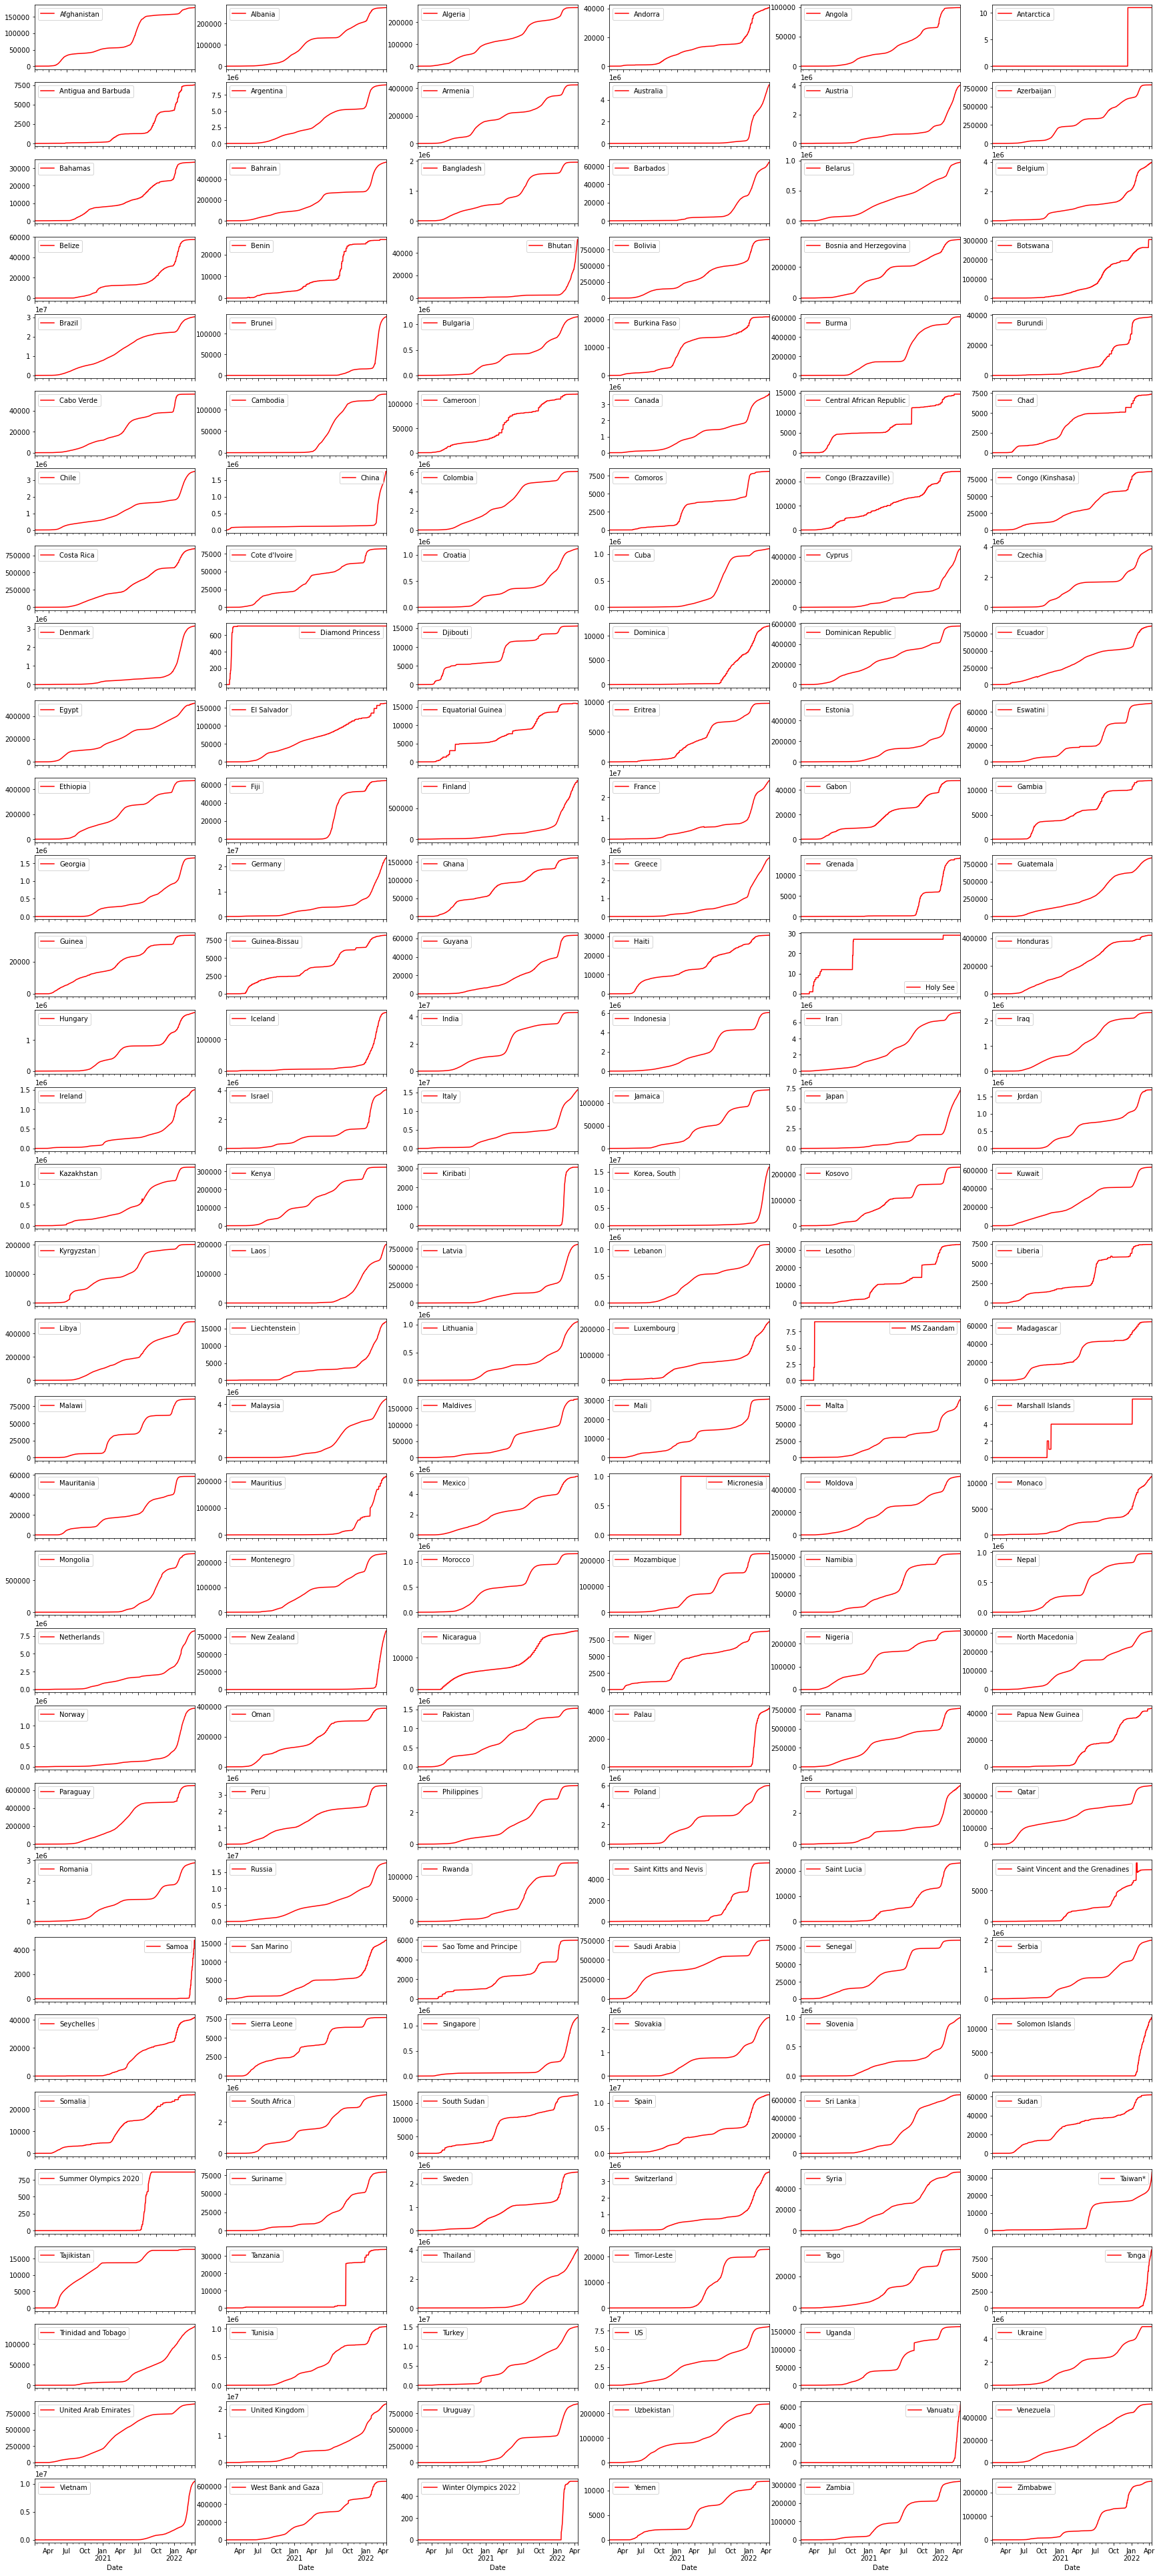

In [18]:
# PART 5

fig, ax = plt.subplots(nrows=33, ncols=6, figsize=(30, 70), sharex= True)  # Creates a subplot with 33 rows and 6 coumns.

axe = ax.flatten()  # Iterate through the subplots by flattening ax first using.ravel() or .flatten()


# Plots a graph of the number of confirmed cases over time for each country.
for i, (key, grp) in enumerate(x_final.groupby(['Country/Region'])):

    grp.plot(ax=axe[i], kind='line', x='Date', y='Confirmed', label=key, color = 'red')

<AxesSubplot:title={'center':'Confirmed COVID-19 Cases Per Capita'}, ylabel='Country/Region'>

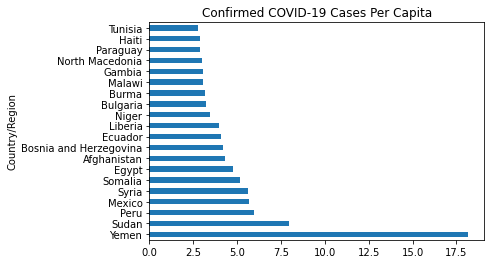

In [10]:
#PART 6

x = x_final.set_index('Country/Region')   # Sets the index of the table to be country.

x = x.drop(['MS Zaandam'])   # Dropped since it was not a country in the list.

x = x.groupby('Country/Region').max()   # Groups the table according to the last reported number for each country.

x['ratio'] = x['Deaths']/(x['Confirmed']/100)  # Computes the number of deaths per 100 confirmed cases.

x.groupby('Country/Region')['ratio'].max().nlargest(20).plot.barh(title = 'Confirmed COVID-19 Cases Per Capita') # Plots a horizontal bargraph of the raitio of the 20 highest countries.


In [11]:
#PART 7

x = x_final.groupby('Country/Region')['Confirmed'].max()

pop = pd.read_json('worldpopulation.json') 


pop.iloc[pop['country'] == 'U.S.', 1:2] = 'US' # Changing the names of countires with diffrent names.

pop.iloc[pop['country'] == 'U.K.', 1:2 ] = 'United Kingdom'  # Changing the names of countires with diffrent names.

pop.iloc[pop['country'] == 'South Korea', 1:2] = 'Korea, South'  # Changing the names of countires with diffrent names.

pop.iloc[pop['country'] == 'TFYR Macedonia', 1:2] = 'North Macedonia' # Changing the names of countires with diffrent names.
    
ratio = pd.merge(pop, x, left_on='country', right_on='Country/Region') # Merges the two dataframes population and cases table using the country name as a key

ratio['population'] = ratio['population'].astype(str).astype(int) # Changing the datatype from object to an int.

ratio['ratio'] = ratio['Confirmed'] /ratio['population'] # Adds a new column named ratio with the computation.

ratio.groupby('country')['ratio'].max().nlargest(10) # Prints the top 10 countries witht the highest ratios.



country
Andorra        0.592320
Denmark        0.550374
Iceland        0.550321
San Marino     0.494456
Israel         0.484074
Slovenia       0.481270
Netherlands    0.481126
Maldives       0.474423
Austria        0.470859
Slovakia       0.461321
Name: ratio, dtype: float64

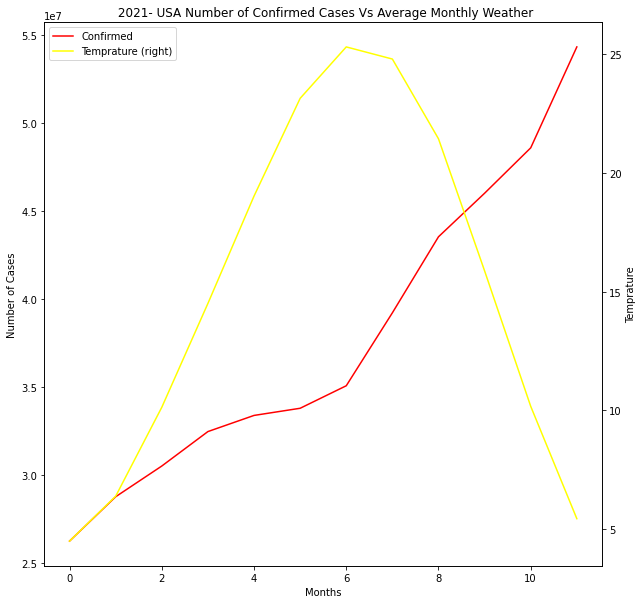

In [111]:
#PART 8 - First Country (US)

climate = pd.read_csv('Temp.csv') # Creates a DataFrame from the CSV file named Temp.csv which contains the average temprature of the US.

US = x_final.loc[x_final['Country/Region'] == 'US'] # Selects all the rows from the Dataframe that are for the country US.

us = US.iloc[:, [0,2]] # Selects only the coulmns 0 which is country and 2 which is confirmed cases.

climate['Date'] = pd.to_datetime(climate['Date']) # Changes the date column in the csv dataframe to be a time series.

y = climate.set_index('Date') # Changes the index of the table to be date.

corr = pd.merge(climate, us, left_on ='Date', right_on = 'Date') # Merges the two datasets.

corr.set_index('Date') # Sets the index of the table to be date.

ax1 = corr.Confirmed.plot(color='red', label='Confirmed', title = ' 2021- USA Number of Confirmed Cases Vs Average Monthly Weather', figsize = (10,10))  # Plots te graph 1 
ax2 = corr.Temprature.plot(color='yellow', secondary_y=True, label='Temprature') # Plots the Temprature as the second Y-Axis.


ax1.set(xlabel = 'Months')  # Sets the x axis on the graph to Month.
ax2.set(ylabel = 'Temprature')  # Sets the y axis on the right to Temprature.
ax1.set(ylabel = 'Number of Cases') # Sets the y axis on the left to Confirmed cases.


h1, l1 = ax1.get_legend_handles_labels() # Gets the Confirmed label.
h2, l2 = ax2.get_legend_handles_labels() # Gets the Temprature label.

plt.legend(h1+h2, l1+l2, loc=2) # Plots the labels Confirmed and Temprature to the graph.





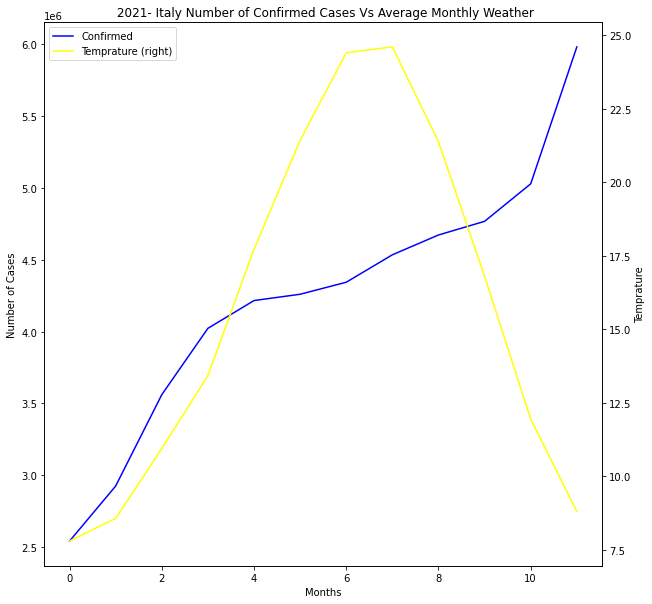

In [12]:
# PART 8 - Second Country (Italy )

climate2 = pd.read_csv('Temp2.csv') # Creates a DataFrame from the CSV file named Temp.csv which contains the average temprature of the Italy.

Italy = x_final.loc[x_final['Country/Region'] == 'Italy'] # Selects all the rows from the Dataframe that are for the country US.

italy = Italy.iloc[:, [0,2]]

climate2['Date'] = pd.to_datetime(climate2['Date']) # Changes the date column in the csv dataframe to be a time series.

y = climate2.set_index('Date') # Changes the index of the table to be date.

corr2 = pd.merge(climate2, italy, left_on ='Date', right_on = 'Date') # Merges the two datasets.

ax3 = corr2.Confirmed.plot(color='blue', label='Confirmed', title = ' 2021- Italy Number of Confirmed Cases Vs Average Monthly Weather', figsize = (10,10))  # Plots te graph 1 
ax4 = corr2.Temprature.plot(color='yellow', secondary_y=True, label='Temprature') # Plots the Temprature as the second Y-Axis.

ax3.set(xlabel = 'Months')  # Sets the x axis on the graph to Month.
ax4.set(ylabel = 'Temprature')  # Sets the y axis on the right to Temprature.
ax3.set(ylabel = 'Number of Cases') # Sets the y axis on the left to Confirmed cases.

h1, l1 = ax3.get_legend_handles_labels() # Gets the Confirmed label.
h2, l2 = ax4.get_legend_handles_labels() # Gets the Temprature label.

plt.legend(h1+h2, l1+l2, loc=2) # Plots the labels Confirmed and Temprature to the graph.




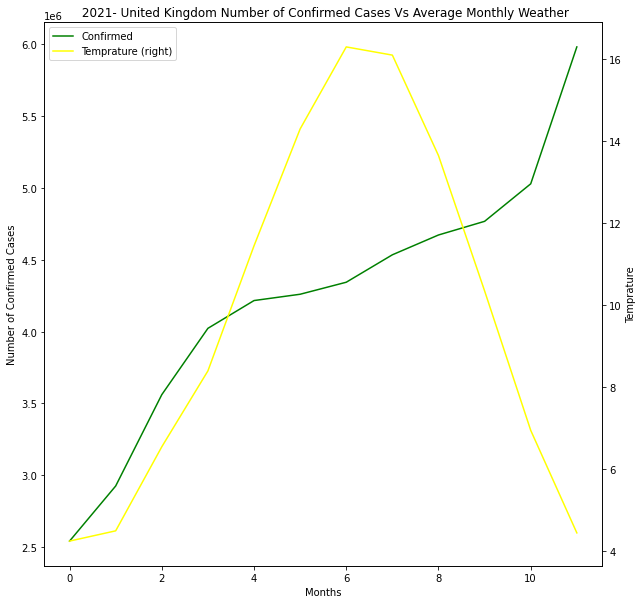

In [13]:
# PART 8 - Second Country (United Kingdom)

climate3 = pd.read_csv('Temp3.csv') # Creates a DataFrame from the CSV file named Temp.csv which contains the average temprature of the Italy.

UK = x_final.loc[x_final['Country/Region'] == 'United Kingdom'] # Selects all the rows from the Dataframe that are for the country US.

uk = Italy.iloc[:, [0,2]]

climate3['Date'] = pd.to_datetime(climate2['Date']) # Changes the date column in the csv dataframe to be a time series.

y = climate3.set_index('Date') # Changes the index of the table to be date.

corr3 = pd.merge(climate3, uk, left_on ='Date', right_on = 'Date') # Merges the two datasets.

ax5 = corr3.Confirmed.plot(color='green', label='Confirmed', title = ' 2021- United Kingdom Number of Confirmed Cases Vs Average Monthly Weather', figsize = (10,10))  # Plots te graph 1 
ax6 = corr3.Temprature.plot(color='yellow', secondary_y=True, label='Temprature') # Plots the Temprature as the second Y-Axis.

ax5.set(xlabel = 'Months')  # Sets the x axis on the graph to Month.
ax6.set(ylabel = 'Temprature')  # Sets the y axis on the right to Temprature.
ax5.set(ylabel = 'Number of Confirmed Cases') # Sets the y axis on the left to Confirmed cases.

h1, l1 = ax5.get_legend_handles_labels() # Gets the Confirmed label.
h2, l2 = ax6.get_legend_handles_labels() # Gets the Temprature label.

plt.legend(h1+h2, l1+l2, loc=2) # Plots the labels Confirmed and Temprature to the graph.




In [ ]:
# Part 9

# Research questions

# 1. Which countires had the lowest number of cases.
# 2. Did countries with highest population have the highest number of confirmed cases.
# 3. Did countries with high income have lower number of cases over time vs a low income country.

In [14]:
# Part 9

# 1. Which countires had the lowest number of cases.

clean = x.drop(['Diamond Princess'])  # Data Cleaning to remove this row from the list that is not a country.
clean = clean.drop(['Summer Olympics 2020']) # Data Cleaning to remove this row from the list that is not a country.
clean = clean.drop(['MS Zaandam']) # Data Cleaning to remove this row from the list that is not a country.
clean = clean.drop(['Winter Olympics 2022']) # Data Cleaning to remove this row from the list that is not a country.


clean.groupby('Country/Region').max().nsmallest(10) # Returns the countries with the lowest number of confirmed cases were reported.



Country/Region
Micronesia                  1
Marshall Islands            7
Antarctica                 11
Holy See                   29
Kiribati                 3071
Palau                    4190
Samoa                    4793
Saint Kitts and Nevis    5557
Sao Tome and Principe    5948
Vanuatu                  6314
Name: Confirmed, dtype: int64

In [15]:
# 2. Did countries with highest population have the highest number of deaths.



pop.groupby('country')['population'].max().nlargest(1)



country
China    1388232693
Name: population, dtype: int64

In [16]:
# 2. Did countries with highest population have the highest number of deaths.

x_final.groupby('Country/Region')['Deaths'].max().nlargest(1)

Country/Region
US    988609
Name: Deaths, dtype: int64

<AxesSubplot:title={'center':'USA VS Zimbabwe'}, xlabel='Date', ylabel='Number of Confirmed Cases'>

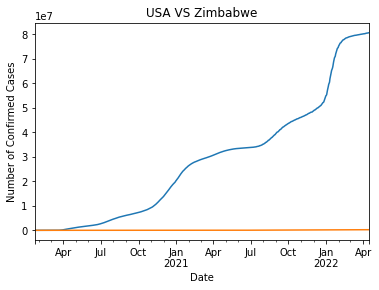

In [121]:
# 3. Did countries with high income have lower rate of number of cases over time vs a low income country.

#US VS Ethiopia.

US = x_final.loc[x_final['Country/Region'] == 'US'] # Selects all the rows from the Dataframe that are for the country US.

US.set_index('Date')

Zimbabwe = x_final.loc[x_final['Country/Region'] == 'Zimbabwe'] # Selects all the rows from the Dataframe that are for the country US.

Zimbabwe.set_index('Date') # Resets index to be Date

US.groupby('Date')['Confirmed'].max().plot(title= 'USA VS Zimbabwe', label= 'US', ylabel = 'Number of Confirmed Cases') 

Zimbabwe.groupby('Date')['Confirmed'].max().plot( label = 'Zimbabwe', ylabel = 'Number of Confirmed Cases')

